In [27]:
import sys
import h5py
import importlib
import multiprocessing
# the mock-0.3.1 dir contains testcase.py, testutils.py & mock.py
sys.path.append('../../')

import matplotlib.pyplot as plt
import numpy as np
from SpecWizard_Input import ReadData
from SpecWizard_BuildInput import Build_Input
from SpecWizard_ProjectData import SightLineProjection
from SpecWizard_ComputeOpticaldepth import ComputeOpticaldepth



In [35]:
import SpecWizard_SaveOpticaldepth
SpecWizard_SaveOpticaldepth = importlib.reload(SpecWizard_SaveOpticaldepth)
from SpecWizard_SaveOpticaldepth import OpticalDepth_IO


In [5]:
buildinput = Build_Input()
wizard = buildinput.read_from_yml('Wizard.yml')

something


In [6]:
wizard['sightline']['nsight'] = 0
read_data = ReadData(wizard)
particles = read_data.read_particles()
sightlineprojection  = SightLineProjection(wizard)
projected_LOS        = sightlineprojection.ProjectData(particles)
cspec          = ComputeOpticaldepth(wizard)
opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)



Element fraction not found using primordial quantities...
Warning! Metallicities not found. Setting them to zero.
We divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite support
Warning! Not able to read Star formation Rate properties...setting SFR to zero!


/cosma/local/Python/3.6.5/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


In [16]:
opticaldepth[('Hydrogen', 'H I')].keys()

dict_keys(['Velocities', 'Optical depths', 'Densities', 'Temperatures', 'TotalIonColumnDensity', 'Mass', 'lambda0', 'f-value'])

In [19]:
wizard['sightline'].keys()

dict_keys(['nsight', 'Number_of_part_this_los', 'x-axis', 'x-position', 'y-axis', 'y-position', 'z-axis', 'z-position', 'short-LOS', 'ProjectionLength', 'ProjectionExtend', 'Boxkms', 'Box', 'sightkms', 'Sight_kms'])

In [23]:
wizard['Output'] = {}
wizard['Output']['directory'] = './'
wizard['Output']['fname'] = 'out.hdf5'

In [66]:
saveOD = OpticalDepth_IO(wizard)

Removing file  ./out.hdf5


In [37]:
outputdic =  {"nsight":0,"Projection":projected_LOS,"OpticaldepthWeighted":opticaldepth}

In [65]:
saveOD.write_to_file(outputdic)

RuntimeError: Unable to create link (name already exists)

In [40]:
def do_sight(isight, projections):
    wizard['sightline']['nsight'] = isight
    read_data = ReadData(wizard)    
    read_data = ReadData(wizard)
    particles = read_data.read_particles()
    sightlineprojection  = SightLineProjection(wizard)
    projected_LOS        = sightlineprojection.ProjectData(particles)
    cspec          = ComputeOpticaldepth(wizard)
    opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)

    particles = read_data.read_particles()
    sightlineprojection  = SightLineProjection(wizard)
    projected_LOS        = sightlineprojection.ProjectData(particles)
    cspec          = ComputeOpticaldepth(wizard)
    opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)
    result                = {"nsight": isight,  
                             "OpticaldepthWeighted":opticaldepth,
                             "Projection":projected_LOS}
    projections[isight] = result

In [47]:
ncpu   = 5       # number of cores to be used
nsight = 500     # number of sight lines to compute

pool   = multiprocessing.Pool(ncpu)
manager      = multiprocessing.Manager()
projections  = manager.dict()

for i in range(nsight):
    pool.apply_async(do_sight, args=(i, projections))
pool.close()
pool.join()

Element fraction not found using primordial quantities...Element fraction not found using primordial quantities...

Warning! Metallicities not found. Setting them to zero.Warning! Metallicities not found. Setting them to zero.

We divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite supportWe divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite support

Warning! Not able to read Star formation Rate properties...setting SFR to zero!Element fraction not found using primordial quantities...Warning! Not able to read Star formation Rate properties...setting SFR to zero!Element fraction not found using primordial quantities...


Element fraction not found using primordial quantities...

Warning! Metallicities not found. Setting them to zero.Warning! Metallicities not found. Setting them to zero.
Warning! Metallicities not found. Setting them to zero.

We divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite

/cosma/local/Python/3.6.5/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/cosma/local/Python/3.6.5/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/cosma/local/Python/3.6.5/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/cosma/local/Python/3.6.5/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/cosma/local/Python/3.6.5/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


Element fraction not found using primordial quantities...
Warning! Metallicities not found. Setting them to zero.
We divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite support
Warning! Not able to read Star formation Rate properties...setting SFR to zero!
Element fraction not found using primordial quantities...
Warning! Metallicities not found. Setting them to zero.
We divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite support
Warning! Not able to read Star formation Rate properties...setting SFR to zero!
Element fraction not found using primordial quantities...
Warning! Metallicities not found. Setting them to zero.
We divide Swift's smoothing length by 0.362 to convert from FWHM to extent of finite support
Warning! Not able to read Star formation Rate properties...setting SFR to zero!
Element fraction not found using primordial quantities...
Warning! Metallicities not found. Setting them to zero.
We divide Swift's smoothi

In [67]:
for project in projections.keys():
    saveOD.write_to_file(projections[project])

In [68]:
import SpecWizard_AnalyseOpticaldepth
SpecWizard_AnalyseOpticaldepth = importlib.reload(SpecWizard_AnalyseOpticaldepth)
from SpecWizard_AnalyseOpticaldepth import Analyse_Opticaldepth

In [69]:
aod = Analyse_Opticaldepth(specfile="out.hdf5",
                 element='Hydrogen',
                 ion='H I')

Using output file


In [87]:
opd = aod.Read_Opticaldepth()

In [88]:
aod.Scale_Tau(opd['Value'])

0.02720559257205717

In [89]:
import SpecWizard_read_obs_data
SpecWizard_read_obs_data = importlib.reload(SpecWizard_read_obs_data)
from SpecWizard_read_obs_data import read_obs_data

In [90]:
read_obsdat = read_obs_data(datapath='../../data/')
viddata = read_obsdat.VidIrsic_2017(filename='VidIrsic2017_data',plot=False)
meanFluxD = np.genfromtxt("../../data/VidMeanFlux.csv",delimiter=',',dtype=float)

In [91]:
vidz = meanFluxD[:,0]
vidMF = meanFluxD[:,1]

In [92]:
box                = wizard['sightline']['Boxkms']['Value']
npix               = len(opd['Value'][0])
data_fit           = vidMF[-1] #np.exp(-AOD.Kim2020_PowerLawTauFit(z))
scale_tau          = aod.Scale_Tau(opd['Value'],meanflux=data_fit,accuracy=1e-4)
akPk               = []
for OD in opd['Value']:

    OD            *= scale_tau
    flux           = np.exp(-OD)
    k,kFPS         = aod.FluxPS(flux,data_fit,npix,box)
    akPk.append(kFPS)


No handles with labels found to put in legend.


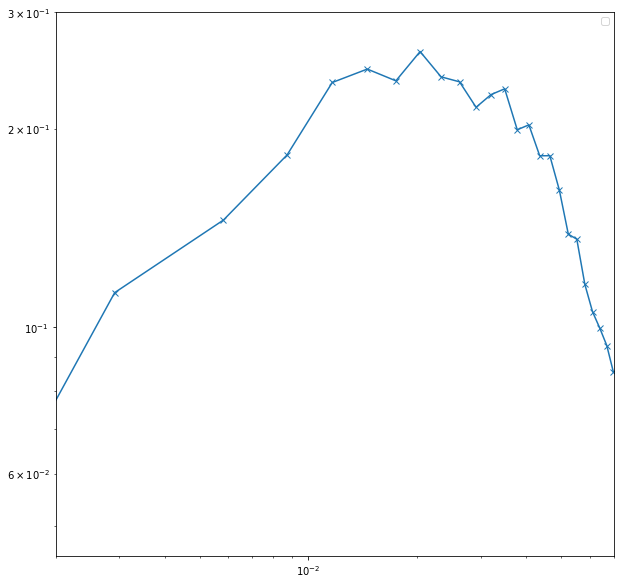

In [101]:
fontsize = 20
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

#for sim in sims:
sim = 'L0100N1504'

vz= str(4.2) #vidz[-1]
#for z,vz in zip(FPS_zs,vidz):

ax.plot(k,1.3*(np.mean(akPk,axis=0)/np.pi), 'x-')

ax.set_xlim(0.002, 0.07)
ax.set_ylim(0.045, 0.3)
#ax.axhline(y=0.07)
#ax.axvline(x=0.01)

ax.semilogx()
ax.semilogy()

ax.legend()